# Simple Keras Neural Network

This simple fully-connected feedforward neural netowrk will be trained on [cat vs. dog dataset from Kaggel](https://www.kaggle.com/c/dogs-vs-cats/data)

In [1]:
# import the necessart packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as ts

from keras.models import Sequential

from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

Using TensorFlow backend.


Let's see what the training data looks like

(374, 500, 3)


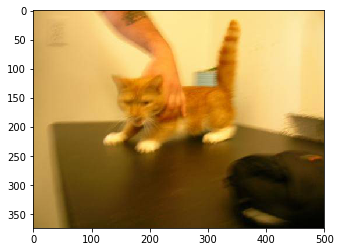

In [4]:
# path to image 
image_path = "kaggle_dogs_vs_cats\\train\\cat.0.jpg"
img = cv2.imread(image_path)
print(img.shape)
plt.imshow(img[...,::-1])
plt.show()

(364, 335, 3)


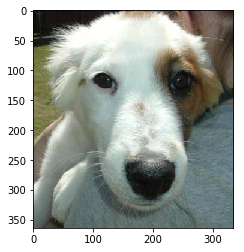

In [6]:
# path to image 
image_path = "kaggle_dogs_vs_cats\\train\\dog.3160.jpg"
img = cv2.imread(image_path)
print(img.shape)
plt.imshow(img[...,::-1])
plt.show()

__Notice, that images are of different shape__ some are silghtly, bigger, some are smaller. 

To feed the images into a feedforward neural network we need to resize all the images to a fixed size and flatten them to a vector

In [8]:
def image_to_feature_vector(image, size=(32, 32)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return np.cv2.resize(image, size).flatten()



Let's see what this returns

In [9]:
image_to_feature_vector(img).shape

(3072,)

___32x32 = 3072, so this returns a flat vector of the resized image.___

Let's initialize a few things

In [10]:
# path to training data
training_data_path = "kaggle_dogs_vs_cats\\train"

# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images(training_data_path))

# initialize the data matrix and the labels list
data = []
labels = []

[INFO] describing images...


In [12]:
imagePaths[:10] # let's see how some paths look like

['kaggle_dogs_vs_cats\\train\\cat.0.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.1.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.10.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.100.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.1000.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.10000.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.10001.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.10002.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.10003.jpg',
 'kaggle_dogs_vs_cats\\train\\cat.10004.jpg']

Now that we have our `imagePaths`, we can loop over them individually, load them from disk, convert the images to features vectors, and then upadte the `data` and `labels` lists:

In [13]:
# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label (assuming that our
    # path as the format: /path/to/dataset/{class}.{image_num}.jpg )
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    
    # construct a feature vector raw pixel intensities, then
    # update the data matrix and lables list
    features = image_to_feature_vector(image)
    data.append(features)
    labels.append(label)
    
    # show an update every 1000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/25000
[INFO] processed 2000/25000
[INFO] processed 3000/25000
[INFO] processed 4000/25000
[INFO] processed 5000/25000
[INFO] processed 6000/25000
[INFO] processed 7000/25000
[INFO] processed 8000/25000
[INFO] processed 9000/25000
[INFO] processed 10000/25000
[INFO] processed 11000/25000
[INFO] processed 12000/25000
[INFO] processed 13000/25000
[INFO] processed 14000/25000
[INFO] processed 15000/25000
[INFO] processed 16000/25000
[INFO] processed 17000/25000
[INFO] processed 18000/25000
[INFO] processed 19000/25000
[INFO] processed 20000/25000
[INFO] processed 21000/25000
[INFO] processed 22000/25000
[INFO] processed 23000/25000
[INFO] processed 24000/25000


Let's see what the labels look like before we one-hot-encode them

In [14]:
labels[:5]

['cat', 'cat', 'cat', 'cat', 'cat']

In [23]:
labels[24000:24005]

['dog', 'dog', 'dog', 'dog', 'dog']

Let's do some preprocessing before we pass it on to ou neural network

In [24]:
# encode the labels, converting them from string to ints
le = LabelEncoder()
labels = le.fit_transform(labels)

In [29]:
labels[:5] # cats

array([0, 0, 0, 0, 0], dtype=int64)

In [26]:
labels[24000:24005] # dogs

array([1, 1, 1, 1, 1], dtype=int64)

In [27]:
# perform feature scaling on raw image pixel values, so that they are 
# in range [0,1] 
data = np.array(data)/255.0

In [28]:
labels.shape

(25000,)

One-hot-encode the labels 

In [30]:
labels = np_utils.to_categorical(labels, num_classes=2)

Lets check out the one-hot-encoded labels

In [32]:
labels[:5] # cats

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]], dtype=float32)

In [33]:
labels[24000:24005] # dogs

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

Partition the data into traning and test. Using 75-25 % split for training and test respectively

_Note: here the 25% test data is playing the part of cross-validation set, we have a separate "test" set to judge performance_ 

In [35]:
# partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/testing split...")
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

[INFO] constructing training/testing split...


### Defining The Model Architecture

We are now ready to deine our architecture for the neural network

The architectre is : 3072->768->384->2


In [36]:
# define the architecture to the network
model = Sequential()

model.add(Dense(units=768, activation="relu", kernel_initializer="uniform"))
model.add(Dense(units=384, activation="relu", kernel_initializer="uniform"))
model.add(Dense(2)) # just a linear layer

model.add(Activation("softmax"))

The next step is to train the model using a learning algorithm. Here, we'll use SGD(Stochastic Gradient Descent)  

We’ll use the `binary_crossentropy`  loss function for the network as well.

In most cases, you’ll want to use just `crossentropy` , but since there are only two class labels, we use `binary_crossentropy` . For > 2 class labels, make sure you use `crossentropy` .

In [37]:
# Train the model using SGD
print("[INFO] compliling model...")
sgd = SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, 
              metrics=['accuracy'])
model.fit(trainData, trainLabels, epochs=50, batch_size=128, verbose=1)

[INFO] compliling model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
18750/18750 [==============================] - 47s 3ms/step - loss: 0.6799 - acc: 0.5688
Epoch 2/50
18750/18750 [==============================] - 39s 2ms/step - loss: 0.6623 - acc: 0.5987
Epoch 3/50
18750/18750 [==============================] - 36s 2ms/step - loss: 0.6553 - acc: 0.6103
Epoch 4/50
18750/18750 [==============================] - 36s 2ms/step - loss: 0.6463 - acc: 0.6229
Epoch 5/50
18750/18750 [==============================] - 36s 2ms/step - loss: 0.6403 - acc: 0.6325
Epoch 6/50
18750/18750 [==============================] - 36s 2ms/step - loss: 0.6360 - acc: 0.6377
Epoch 7/50
18750/18750 [==============================] - 36s 2ms/step - loss: 0.6294 - acc: 0.6461
Epoch 8/50
18750/18750 [==============================] - 39s 2ms/step - loss: 0.6265 - acc: 0.6483
Epoch 9/50
18750/18750 [=============================

### Classifying images using our trained neural network 

This final code block evaluates our neural network on the test data

In [38]:
# show the accuracy on the test set
print("[INFO] evaluating on the test set...")
loss, accuracy = model.evaluate(testData, testLabels, batch_size=128, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4g}%".format(loss, accuracy *100))

[INFO] evaluating on the test set...
6250/6250 [==============================] - 6s 910us/step
[INFO] loss=0.6121, accuracy: 66.98%


Our Accuracy is only **66.98%** compared to training accuracy of **76.60%**. ___This mean we are overfitting a bit___ 

Dump the network architecture and weights into a file, to be used later(Make sure the directory "output" exists) 

In [43]:
print("[INFO] dumping architecture and weights to file...")
model.save("output\\simple_nn.h5")

[INFO] dumping architecture and weights to file...


## Classifying Images using our stored Keras Model


Let's define a few paths and constants

In [57]:
#import a few necssary packages not defined above
from keras.models import load_model

model_path = "output\\simple_nn.h5"
test_images_path = "test1"

batch_size = 32

Let’s define our classes and load our serialized model from disk:

In [46]:
# initialize the class labels
CLASSES = ["cat", "dog"]

# load network
print("[INFO] loading network architecture and weights...")
model = load_model(model_path)
print("[INFO] testing on images in {}".format(test_images_path))

[INFO] loading network architecture and weights...
[INFO] testing on images in \test1


When we loop over the images in the test set and pass them throgh the network for prediction, we need to do the same preprocessing on them as we did on the training set.

Let's start the loop:

[INFO] classifying test1\1.jpg
[INFO] classifying test1\10.jpg
[INFO] classifying test1\100.jpg
[INFO] classifying test1\1000.jpg
[INFO] classifying test1\10000.jpg


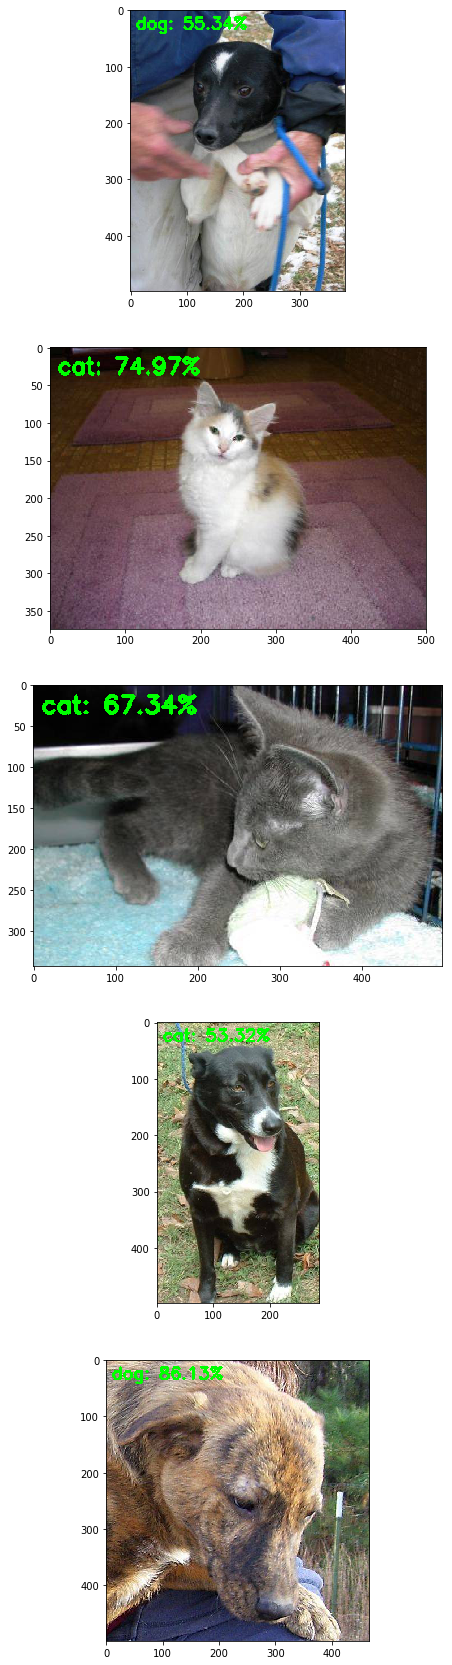

In [61]:
fig, ax = plt.subplots(5,1, figsize=(30, 30))

counter = 0 # loop over 5 images and display their results
# loop over the test set
for imagePath in paths.list_images(test_images_path):
    
    # load the image, resize it to 32x32 pixels, then extract 
    # features from it and normalize them
    print("[INFO] classifying {}".format(
        imagePath[imagePath.rfind("/")+1:]))
    image = cv2.imread(imagePath)
    features = image_to_feature_vector(image)/255.0
    features = np.array([features])
    
    # classify the image using our extracted features and pre-trained
    # neural net
    probs = model.predict(features)[0]
    prediction = probs.argmax(axis=0)
    
    
    # draw the class and probability on the test image and display it
    label = "{}: {:.2f}%".format(CLASSES[prediction],
    probs[prediction] * 100)
    cv2.putText(image, label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,
        1.0, (0, 255, 0), 3)
    
    ax[counter].imshow(image[...,::-1])
    counter+=1
    
    if counter==5: 
        break

plt.show()
    

There will be a few mis-classifications as our accuracy is not that great. For example the second last test image the _dog_ is predicted as a _cat_  